PE Ratio Analysis for the Magnificent 7 (2022–2025)

Problem Statement
Analyze historical PE ratios of the Magnificent 7 stocks from 2022–2025

Loading the file which contains the PE-Ratio Data which was entered manually using the website Marcotrends

In [ ]:

import pandas as pd

# file path
file_path = r"C:\Users\surji\Desktop\Quant_Poject\Pe ratio\peratio.xlsx" #xcel file path

# read excel
df = pd.read_excel(file_path)

print(df.head())


  Ticker Name       Date  Stock Price Net EPS     PE
0        NVDA 2025-07-11       164.92     NaN  53.20
1        NVDA 2025-04-30       108.91   $3.10  35.13
2        NVDA 2025-01-31       120.05   $2.94  40.86
3        NVDA 2024-10-31       132.73   $2.54  52.23
4        NVDA 2024-07-31       116.98   $2.13  54.87


Converting to datetime so that mathplot or pandas does not read the "Date" as normal text

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

Percentile Calculation

In [19]:
p10 = df['PE'].quantile(0.10)
p90 = df['PE'].quantile(0.90)
print(f"10th percentile: {p10:.2f}")
print(f"90th percentile: {p90:.2f}")


below_10 = df[df['PE'] <= p10]
above_90 = df[df['PE'] >= p90]

print("\nDates where PE was below 10th percentile:")
print(below_10[['Date', 'PE']])

print("Dates where PE was above 90th percentile:")
print(above_90[['Date', 'PE']])


10th percentile: 44.38
90th percentile: 112.56

Dates where PE was below 10th percentile:
        Date     PE
1 2025-04-30  35.13
2 2025-01-31  40.86
Dates where PE was above 90th percentile:
        Date      PE
8 2023-07-31  112.81
9 2023-04-30  144.43


Plotting the graph

The following graph is for the stock - NVDA ( Nvidia )

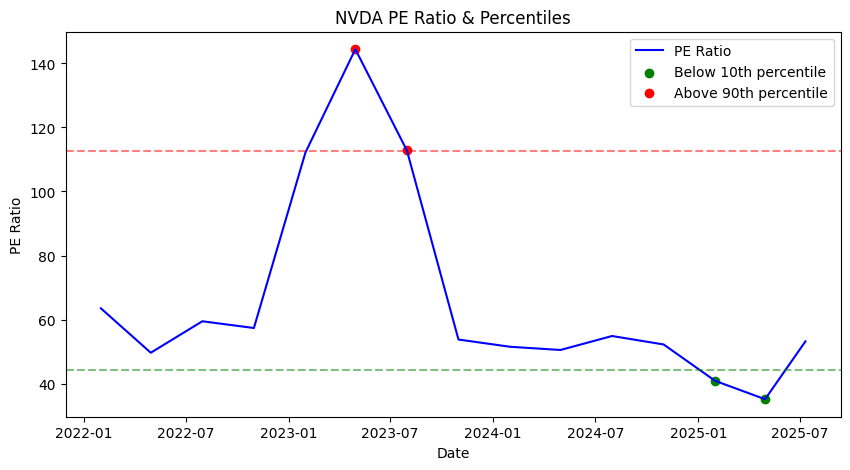

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['PE'], label='PE Ratio', color='blue')

plt.scatter(below_10['Date'], below_10['PE'], color='green', label='Below 10th percentile')
plt.scatter(above_90['Date'], above_90['PE'], color='red', label='Above 90th percentile')

plt.axhline(p10, color='green', linestyle='--', alpha=0.5)
plt.axhline(p90, color='red', linestyle='--', alpha=0.5)

plt.title('NVDA PE Ratio & Percentiles')
plt.xlabel('Date')
plt.ylabel('PE Ratio')
plt.legend()
plt.show()


Before plotting the graph of all the 7 magnificent stocks, I extracted the historical pe ratio data only for NVDA and plotted the graph.
This step is neccesary in order to make sure we are getting the correct image of the graph with the correctly calculated percentile values.

In [8]:
import pandas as pd

file_path = r"C:\Users\surji\Desktop\Quant_Poject\Pe ratio\peratio.xlsx"
tickers = ['NVDA', 'AAPL','MSFT','GOOGL', 'AMZN', 'META', 'TSLA']

all_data = []

for ticker in tickers:
    
    df = pd.read_excel(file_path, sheet_name=ticker)
    
    # rename columns to consistent format
    df.columns = ['TickerName', 'Date', 'StockPrice', 'NetEPS', 'PE']
    df['Date'] = pd.to_datetime(df['Date'])
    
    # add to list
    all_data.append(df[['Date', 'TickerName', 'PE']])

# combine all
combined_df = pd.concat(all_data, ignore_index=True)

print("\nCombined data:")
print(combined_df.head())



Combined data:
        Date TickerName     PE
0 2025-07-11       NVDA  53.20
1 2025-04-30       NVDA  35.13
2 2025-01-31       NVDA  40.86
3 2024-10-31       NVDA  52.23
4 2024-07-31       NVDA  54.87


In [9]:
# dictionary to store percentiles
percentiles = {}

for ticker in tickers:
    subset = combined_df[combined_df['TickerName'] == ticker]
    p10 = subset['PE'].quantile(0.10)
    p90 = subset['PE'].quantile(0.90)
    percentiles[ticker] = {'p10': p10, 'p90': p90}
    print(f"{ticker} -> 10th percentile: {p10:.2f}, 90th percentile: {p90:.2f}")


NVDA -> 10th percentile: 44.38, 90th percentile: 112.56
AAPL -> 10th percentile: 22.23, 90th percentile: 37.10
MSFT -> 10th percentile: 26.02, 90th percentile: 37.12
GOOGL -> 10th percentile: 19.10, 90th percentile: 25.38
AMZN -> 10th percentile: 32.69, 90th percentile: 103.40
META -> 10th percentile: 13.49, 90th percentile: 27.92
TSLA -> 10th percentile: 48.06, 90th percentile: 164.45


In [10]:
below_10_all = pd.DataFrame()
above_90_all = pd.DataFrame()

for ticker in tickers:
    subset = combined_df[combined_df['TickerName'] == ticker]
    p10 = percentiles[ticker]['p10']
    p90 = percentiles[ticker]['p90']
    
    below_10 = subset[subset['PE'] < p10]
    above_90 = subset[subset['PE'] > p90]
    
    below_10_all = pd.concat([below_10_all, below_10])
    above_90_all = pd.concat([above_90_all, above_90])


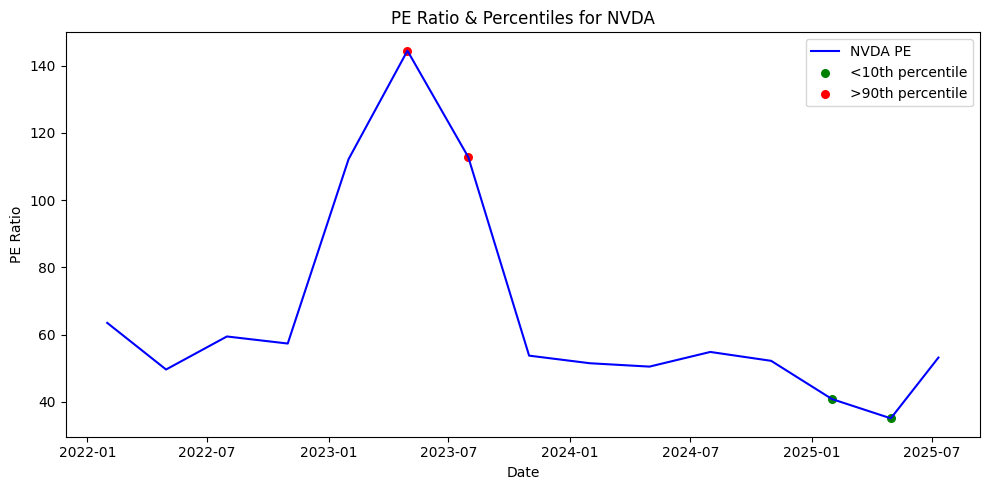

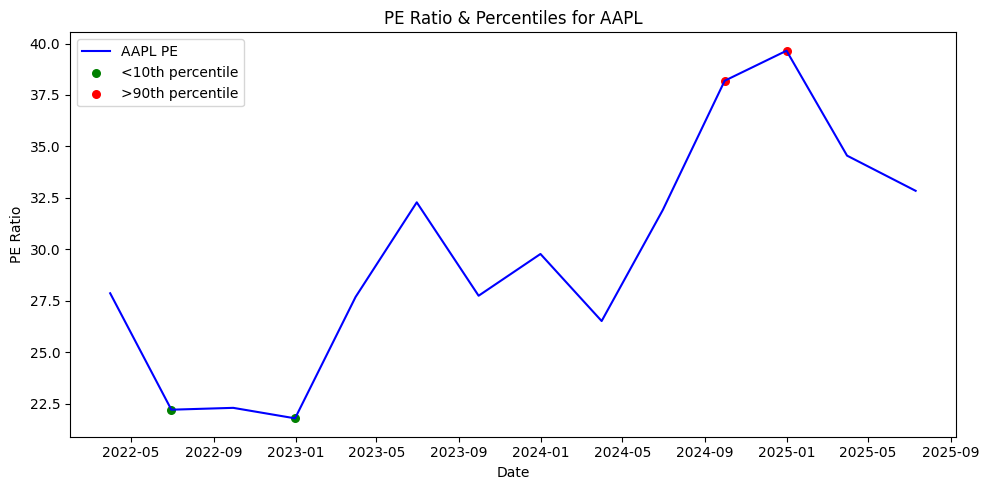

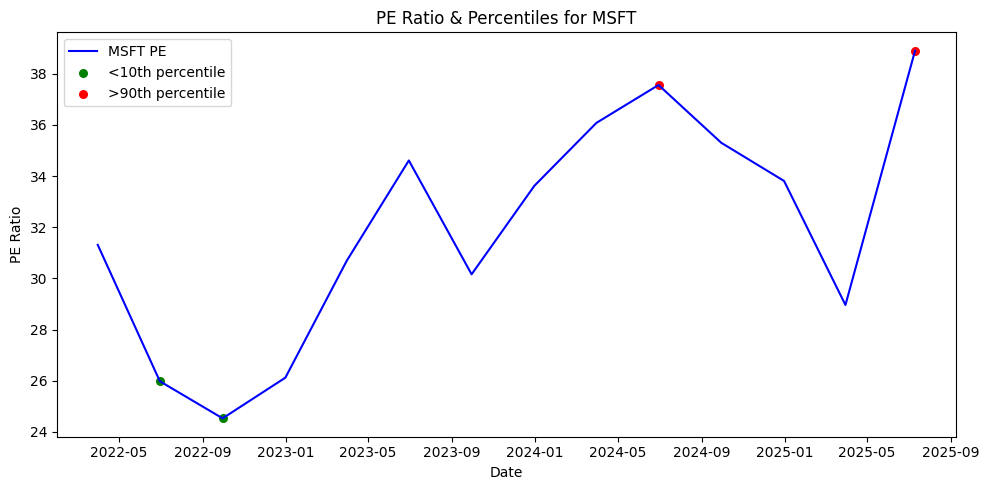

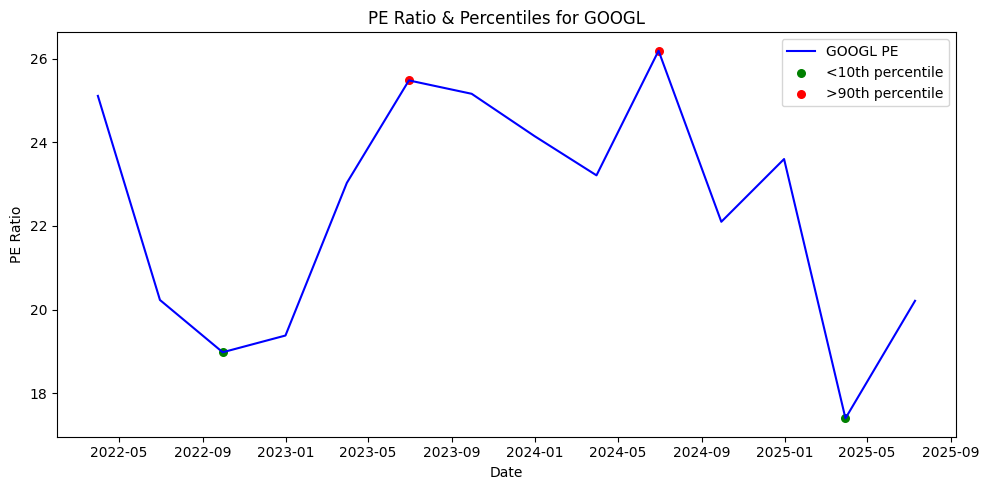

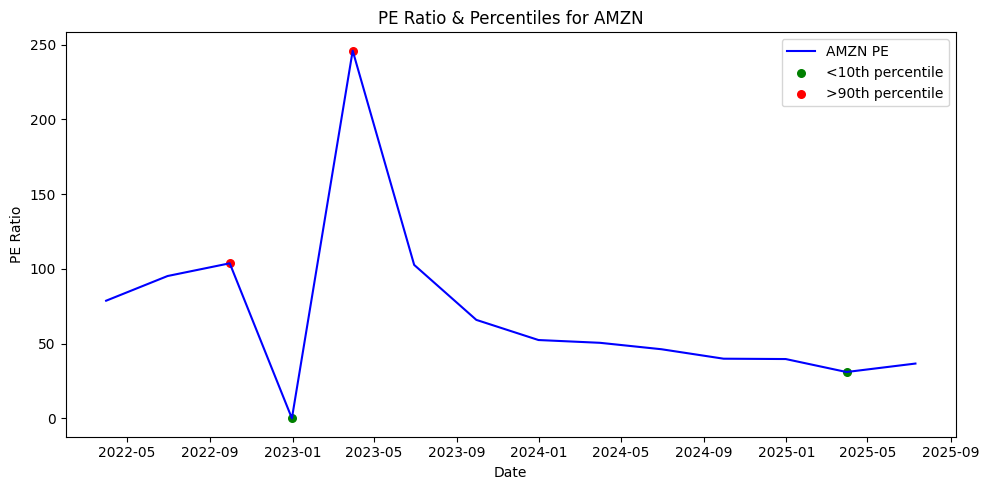

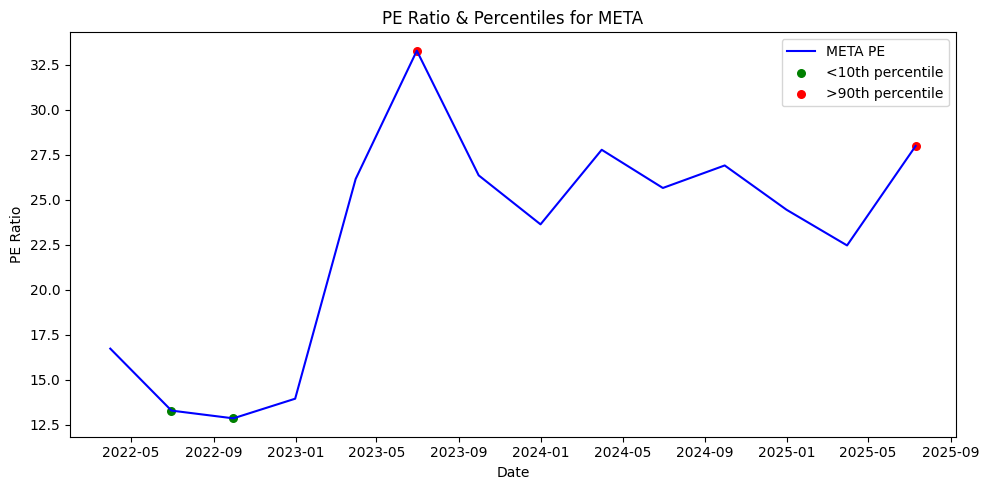

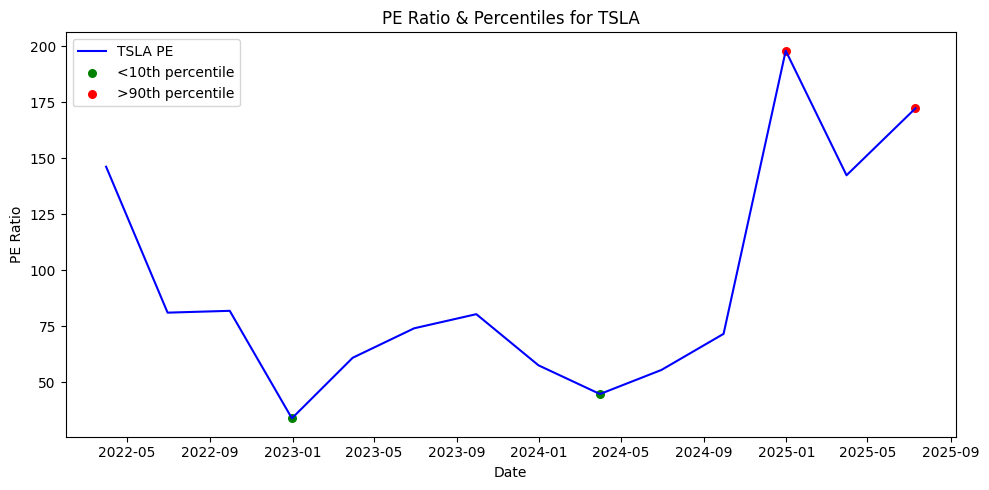

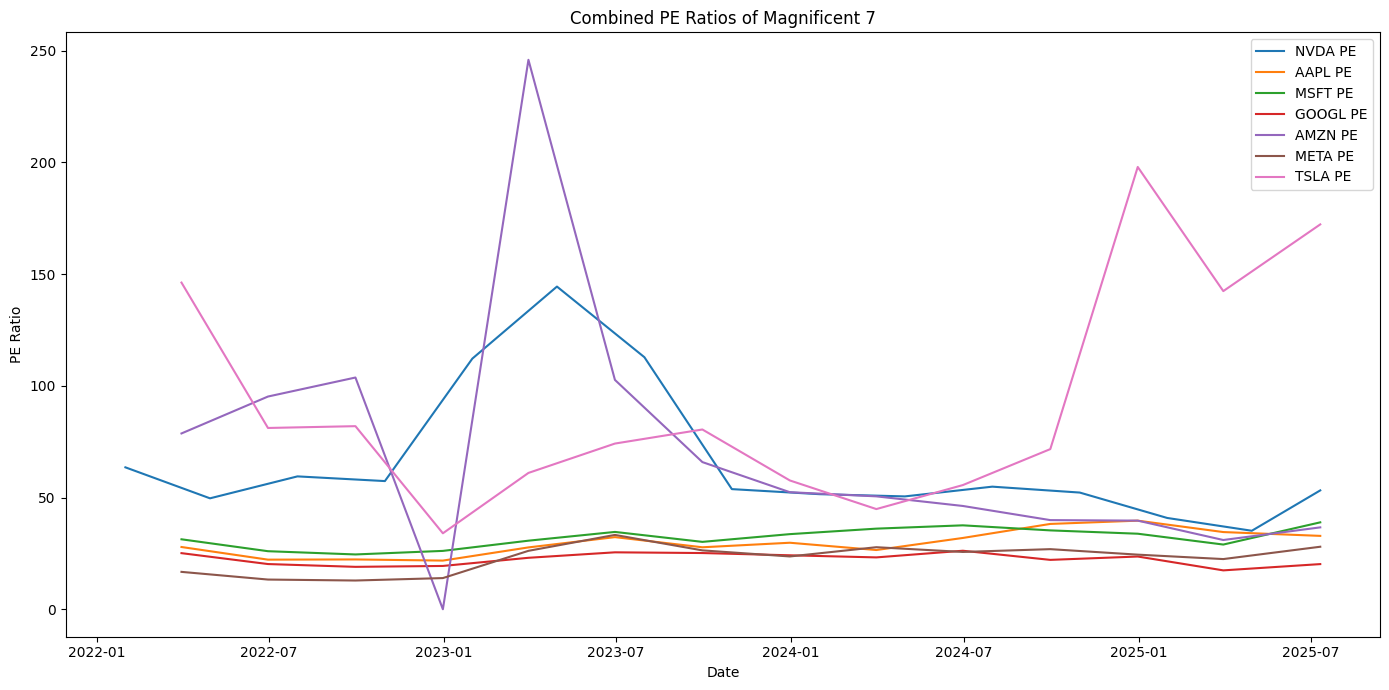

In [ ]:
import matplotlib.pyplot as plt

#Plotting different graph for different stocks.
for ticker in tickers:
    plt.figure(figsize=(10, 5))
    
    subset = combined_df[combined_df['TickerName'] == ticker]
    plt.plot(subset['Date'], subset['PE'], label=f"{ticker} PE", color='blue')
    
    # mark below 10th percentile
    p10 = percentiles[ticker]['p10']
    below_10 = subset[subset['PE'] < p10]
    plt.scatter(below_10['Date'], below_10['PE'], color='green', s=30, label='<10th percentile')
    
    # mark above 90th percentile
    p90 = percentiles[ticker]['p90']
    above_90 = subset[subset['PE'] > p90]
    plt.scatter(above_90['Date'], above_90['PE'], color='red', s=30, label='>90th percentile')
    
    plt.title(f'PE Ratio & Percentiles for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('PE Ratio')
    plt.legend()
    plt.tight_layout() 
    plt.show()

#Combined Graph
plt.figure(figsize=(14, 7))

for ticker in tickers:
    subset = combined_df[combined_df['TickerName'] == ticker]
    plt.plot(subset['Date'], subset['PE'], label=f"{ticker} PE")

plt.title('PE Ratios of all Magnificent 7 stocks')
plt.xlabel('Date')
plt.ylabel('PE Ratio')
plt.legend()
plt.tight_layout()
plt.show()





My analysis looking at graph:

1. Stocks like NVDA and TSLA, shows the highest fluctuations with sharp drops and peaks 
2. Stock AMZN shows a temporary peak which was in early 2023, which indicates that the PE ratio increased significantly, but later on it stabilized.
3. Stocks such as AAPL, MSFT, GOOGL and META show relatively stable PE ratios over the same period of time, with the least fluctuations.
